## Лабораторная №1 "Тело, брошенное под углом к горизонту"

<img src="telo.jpg">

Угол полета: $$ \alpha = 45^0 $$

In [1]:
alfa = 45 * 3.14 / 180

Начальная скорость полета: $$ V = 20 м/с $$

In [2]:
v = 20

Проекции на оси (начальная скорость):  
$$ V_{ox} = V * cos(\alpha) $$  
$$ V_{oy} = V * sin(\alpha) $$ 

In [3]:
from math import *
vox = v * cos(alfa)
voy = v * sin(alfa)

Гравитационная постоянная: $$ g = 9.81 $$

In [4]:
g = 9.81

## Случай 1: Сопротивление воздуха отсутствует $k = 0$

### Аналитеческое решение

Дальность полета: $$ L = 2 * \frac{V_{ox} * V_{oy}}{g} $$  
Время полета: $$ t = \frac{(L - x_o)}{V_{ox}} $$

In [5]:
L = 2 * vox * voy / g
t = (L - 0) / vox

При расчетах шаг по времени возьмем: $$ \Delta t = 0.1 $$

In [6]:
deltaT = 0.01

Траектория полета: $$ y(x) = -\frac{g}{2V_{ox}^2}x^2 + \frac{V_{oy}}{V_{ox}}x $$

In [7]:
import numpy as np
x_an = np.arange(0, L, deltaT)

In [8]:
import matplotlib.pyplot as plt
plt.plot(x_an, ((-g / (2 * (vox ** 2))) * (x_an ** 2)) + ((voy / vox) * x_an))
plt.title("Аналитическое решение")
plt.show()

### Численное решение

Дифференциальные условия:  
$$ \frac{\mathrm{d}x}{\mathrm{d}t} = V_x $$   
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = V_y $$   
$$ \frac{\mathrm{d}V_x}{\mathrm{d}t} = 0 $$  
$$ \frac{\mathrm{d}V_y}{\mathrm{d}t} = -g $$

#### Метод Эйлера

$$ V_x^{j+1} = V_x^j $$  
$$ V_y^{j+1} = V_y^j - g \Delta t $$  
$$ x^{j+1} = x^j + V_x^j\Delta t $$  
$$ y^{j+1} = y^j + V_y^j\Delta t $$

In [9]:
# Задаем начальные значения массивов:
x = np.array([0])
y = np.array([0])

# напишим функцию для инициализации массивов координат:
def initEulerDistance(x, y):
    xi = 0
    yi = 0
    vxi = vox
    vyi = voy
    i = 0
    while (yi >= 0):
        i = i + 1
        vxi = vxi + 0
        vyi = vyi - g * deltaT
        xi = xi + vxi * deltaT
        yi = yi + vyi * deltaT
        x = np.append(x, xi)
        y = np.append(y, yi)
    return (x, y);

# Инициализируем массивы значениями:
x, y = initEulerDistance(x, y)

# Распечатаем их:
# print(x)
# print(y)

Построим график траектории движения тела:

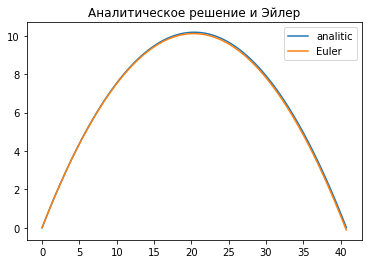

In [10]:
plt.plot(x_an, ((-g / (2 * (vox ** 2))) * (x_an ** 2)) + ((voy / vox) * x_an), label='analitic')
plt.plot(x, y, label='Euler')
plt.title("Аналитическое решение и Эйлер")
plt.legend()
plt.show()

#### Двушаговый метод

$$ V^{j+2} = V^j - 2\Delta tg $$  
$$ x^{j+1} = x^{j-1} + 2\Delta tV^j $$ 

In [11]:
# Задаем начальные значения массивов:
x1 = np.array([])
y1 = np.array([])

def getNext(x_pred, v_):
    return x_pred + 2 * deltaT * v_

def getNextVx(v_pred):
    return v_pred

def getNextVy(v_pred):
    return v_pred - 2 * deltaT * g

vx_pred = vox # Vxn-1
vy_pred = voy

x_pred = 0 # xn-1
y_pred = 0
x_cur = x_pred + vx_pred * deltaT # xn
y_cur = y_pred + vy_pred * deltaT

while (x_pred >= 0 and y_pred >= 0):
    x1 = np.append(x1, x_pred)
    y1 = np.append(y1, y_pred)
    
    vx_next = getNextVx(vx_pred)
    vy_next = getNextVy(vy_pred)
    
    vx_cur = (vx_next + vx_pred) / 2 # (V2 + V0) / 2 = V1
    vy_cur = (vy_next + vy_pred) / 2
    
    x_next = getNext(x_pred, vx_cur)
    y_next = getNext(y_pred, vy_cur)
    
    vx_pred = vx_cur
    vy_pred = vy_cur
    
    x_pred = x_cur
    y_pred = y_cur
    
    x_cur = x_next
    y_cur = y_next    
    

# Распечатаем их:
# print(x1)
# print(y1)

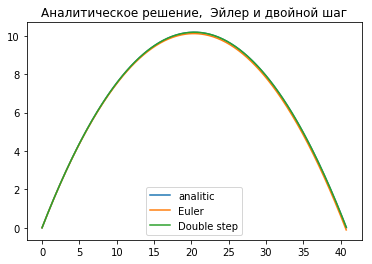

In [12]:
plt.plot(x_an, ((-g / (2 * (vox ** 2))) * (x_an ** 2)) + ((voy / vox) * x_an), label='analitic')
plt.plot(x, y, label='Euler')
plt.plot(x1, y1, label='Double step')
plt.title("Аналитическое решение,  Эйлер и двойной шаг")
plt.legend()
plt.show()

### Случай 2: Есть сопротивление воздуха $ K = 1 $

In [13]:
k = 1

Массу тела примем: $$ m = 10 $$

In [14]:
m = 10

Дифференциальные условия:  
$$ \frac{\mathrm{d}V_x}{\mathrm{d}t} = -\frac{k}{m}V_x $$  
$$ \frac{\mathrm{d}V_y}{\mathrm{d}t} = -g - \frac{k}{m}V_y $$  
$$ \frac{\mathrm{d}x}{\mathrm{d}t} = V_x $$  
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = V_y $$

#### Метод Эйлера

$$ V_x^{j+1} = V_x^j - \frac{k}{m}V_x^j \Delta t $$  
$$ V_y^{j+1} = V_y^j - (g + \frac{k}{m}V_y^j)\Delta t $$  
$$ x^{j+1} = x^j + V_x^j\Delta t $$  
$$ y^{j+1} = y^j + V_y^j\Delta t $$

In [15]:
# Задаем начальные значения массивов:
x2 = np.array([0])
y2 = np.array([0])

# напишим функцию для инициализации массивов координат:
def initEulerDistance(x, y):
    xi = 0
    yi = 0
    vxi = vox
    vyi = voy
    i = 0
    while (yi >= 0):
        i = i + 1
        vxi = vxi - (k / m) * vxi * deltaT
        vyi = vyi - (g + (k / m) * vyi) * deltaT
        xi = xi + vxi * deltaT
        yi = yi + vyi * deltaT
        x = np.append(x, xi)
        y = np.append(y, yi)
    return (x, y);

# Инициализируем массивы значениями:
x2, y2 = initEulerDistance(x2, y2)

# Распечатаем их:
# print(x2)
# print(y2)

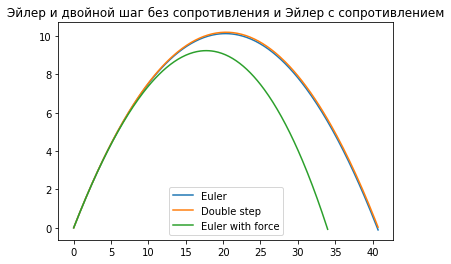

In [16]:
plt.plot(x, y, label='Euler')
plt.plot(x1, y1, label='Double step')
plt.plot(x2, y2, label='Euler with force')
plt.title("Эйлер и двойной шаг без сопротивления и Эйлер с сопротивлением")
plt.legend()
plt.show()

#### Двушаговый метод

$$ V_x^{j+2} = (1 - 2\Delta t\frac{k}{m})V_x^j $$  
$$ V_y^{j+2} = (1 - 2\Delta t\frac{k}{m})V_y^j - 2\Delta tg $$  
$$ x^{j+1} = x^{j-1} + 2\Delta tV^j $$ 

In [17]:
# Задаем начальные значения массивов:
x3 = np.array([])
y3 = np.array([])

def getNextVxNew(v_pred):
    return v_pred * (1 - 2 * deltaT * (k / m))

def getNextVyNew(v_pred):
    return v_pred * (1 - 2 * deltaT * k / m) - 2 * deltaT * g

vx_pred = vox
vy_pred = voy

x_pred = 0
y_pred = 0
x_cur = x_pred + vx_pred * deltaT
y_cur = y_pred + vy_pred * deltaT

while (x_pred >= 0 and y_pred >= 0):
    x3 = np.append(x3, x_pred)
    y3 = np.append(y3, y_pred)
    
    vx_next = getNextVxNew(vx_pred)
    vy_next = getNextVyNew(vy_pred)
    
    vx_cur = (vx_next + vx_pred) / 2
    vy_cur = (vy_next + vy_pred) / 2
    
    x_next = getNext(x_pred, vx_cur)
    y_next = getNext(y_pred, vy_cur)
    
    vx_pred = vx_cur
    vy_pred = vy_cur
    
    x_pred = x_cur
    y_pred = y_cur
    
    x_cur = x_next
    y_cur = y_next    
    

# Распечатаем их:
# print(x3)
# print(y3)

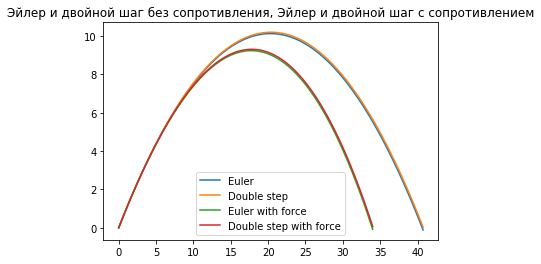

In [18]:
plt.plot(x, y, label='Euler')
plt.plot(x1, y1, label='Double step')
plt.plot(x2, y2, label='Euler with force')
plt.plot(x3, y3, label='Double step with force')
plt.title("Эйлер и двойной шаг без сопротивления, Эйлер и двойной шаг с сопротивлением")
plt.legend()
plt.show()